In [213]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord

In [214]:
# we care about galactic latitude(b) not longitude(l)

In [215]:
# gets the coordinate file
coordinateFileName = 'currentTargets.txt'
coordinateDir = 'coordinateFiles/'
coordinateFileDir = coordinateDir + coordinateFileName

objectInfoList = np.genfromtxt(coordinateFileDir, names=True, dtype=None)
fakeList = np.genfromtxt(coordinateFileDir, names=True, dtype=None)

numTargets = objectInfoList.size
realV = objectInfoList['GAMMA']*u.km/u.s
realVe = objectInfoList['GAMMAE']*u.km/u.s

In [243]:
# getting the real coordinates into SkyCoord
realCinICRS = SkyCoord(ra=objectInfoList['RA']*u.degree, dec=objectInfoList['DEC']*u.degree, frame='icrs')
# getting the real coordinates into galactic frame
realCinGALACTIC = realCinICRS.transform_to('galactic')

# getting the galactic mid plane for plotting
galacticMidCinGALACTIC = SkyCoord(l=np.arange(360)*u.degree, b=np.zeros(360)*u.degree, frame='galactic')
galacticMidCinICRS = galacticMidCinGALACTIC.transform_to('icrs')
galacticZeroCinGALACTIC = SkyCoord(l=np.zeros(180)*u.degree, b=np.arange(-90,90)*u.degree, frame='galactic')
galacticZeroCinICRS = galacticZeroCinGALACTIC.transform_to('icrs')

In [241]:
# looping through and creating data
for x in range(numTargets):
    realCoordICRS = SkyCoord(ra=fakeList['RA'][x]*u.degree, dec=fakeList['DEC'][x]*u.degree, frame='icrs')
    realCoordG = realCoordICRS.transform_to('galactic')
    lowGbound = 0
    highGbound = 360
    #print realCoordG.l.degree
    if realCoordG.l.degree > 120:
        lowGbound = 120
    elif realCoordG.l.degree < 120:
        highGbound = 120
        
    while True:
        newFakeCoordG = SkyCoord(l=(np.random.rand()*(highGbound-lowGbound)+lowGbound)*u.degree,
                                 b=realCoordG.b, frame='galactic')
        newFakeCoordICRS = newFakeCoordG.transform_to('icrs')
        if newFakeCoordICRS.dec.degree>0 and newFakeCoordICRS.dec.degree<40:
            break
    
    fakeList['RA'][x] = newFakeCoordICRS.ra.degree
    fakeList['DEC'][x] = newFakeCoordICRS.dec.degree
    fakeList['Name'][x] = str(x)

In [244]:
# getting the real coordinates into SkyCoord
fakeCinICRS = SkyCoord(ra=fakeList['RA']*u.degree, dec=fakeList['DEC']*u.degree, frame='icrs')
fakeCinGALACTIC = fakeCinICRS.transform_to('galactic')

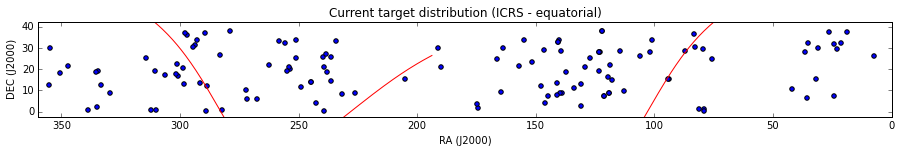

In [218]:
# looks at the distribution of real targets (ICRS - equatorial)
plt.figure(figsize=[15.3,1.7])
plt.scatter(realCinICRS.ra.deg, realCinICRS.dec.deg)
plt.plot(galacticMidCinICRS.ra.deg, galacticMidCinICRS.dec.deg, 'red')
plt.plot(galacticZeroCinICRS.ra.deg, galacticZeroCinICRS.dec.deg, 'red')
plt.xlim(360,0)
plt.ylim(-2.5,42.5)
plt.xlabel("RA (J2000)")
plt.ylabel("DEC (J2000)")
plt.title("Current target distribution (ICRS - equatorial)")
plt.show()

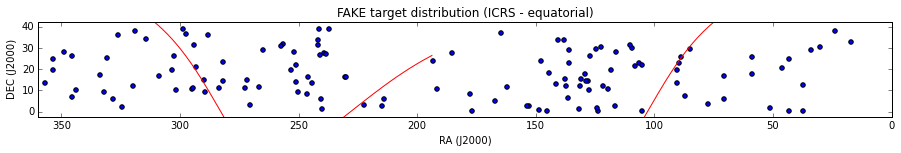

In [245]:
# looks at the distribution of FAKE targets (ICRS - equatorial)
plt.figure(figsize=[15.3,1.7])
plt.scatter(fakeCinICRS.ra.deg, fakeCinICRS.dec.deg)
plt.plot(galacticMidCinICRS.ra.deg, galacticMidCinICRS.dec.deg, 'red')
plt.plot(galacticZeroCinICRS.ra.deg, galacticZeroCinICRS.dec.deg, 'red')
plt.xlim(360,0)
plt.ylim(-2.5,42.5)
plt.xlabel("RA (J2000)")
plt.ylabel("DEC (J2000)")
plt.title("FAKE target distribution (ICRS - equatorial)")
plt.show()

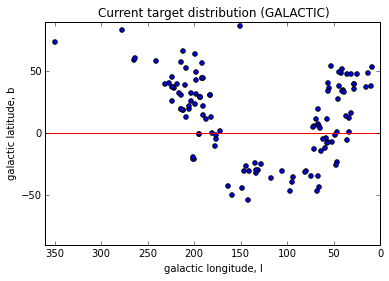

In [247]:
# looks at the distribution of FAKE targets (GALACTIC)
#plt.figure(figsize=[15.3,1.7])
plt.scatter(realCinGALACTIC.l.deg, realCinGALACTIC.b.deg)
plt.plot(galacticMidCinGALACTIC.l.deg, galacticMidCinGALACTIC.b.deg, 'red')
plt.xlim(360,0)
plt.ylim(-90,90)
plt.xlabel("galactic longitude, l")
plt.ylabel("galactic latitude, b")
plt.title("Current target distribution (GALACTIC)")
plt.show()

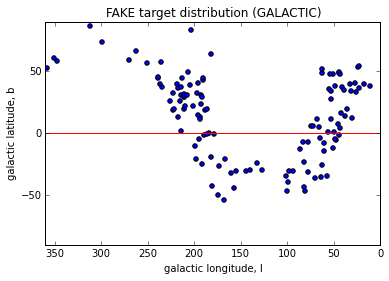

In [250]:
# looks at the distribution of real targets (GALACTIC)
#plt.figure(figsize=[15.3,1.7])
plt.scatter(fakeCinGALACTIC.l.deg, fakeCinGALACTIC.b.deg)
plt.plot(galacticMidCinGALACTIC.l.deg, galacticMidCinGALACTIC.b.deg, 'red')
plt.xlim(360,0)
plt.ylim(-90,90)
plt.xlabel("galactic longitude, l")
plt.ylabel("galactic latitude, b")
plt.title("FAKE target distribution (GALACTIC)")
plt.show()

In [261]:
# prints out info into the text file
fileName = 'fakeTargets.txt'
f = open('coordinateFiles/' + fileName, 'w')
for x in range(numTargets):
    f.write(fakeList[x])
f.close()

TypeError: Non-character array cannot be interpreted as character buffer.

In [256]:
np.savetxt('coordinateFiles/fakeTargets.txt', fakeList)

TypeError: float argument required, not numpy.string_

In [257]:
fakeList.tofile('coordinateFiles/fakeTargets.txt')


In [259]:
print fakeList

[('0', 302.4233353200831, 26.517022400710584, -53.2, 5.0)
 ('1', 241.3727432331791, 39.240406671727875, -29.0, 10.0)
 ('2', 332.07527624433374, 9.179683753495013, -18.3, 24.8)
 ('3', 70.82210898343122, 5.916003584744276, 48.0, 3.0)
 ('4', 30.125951043575512, 30.631093315354253, -29.0, 4.0)
 ('5', 46.0596498965018, 20.87915078956918, 69.0, 1.0)
 ('6', 17.15079718737046, 32.84312672729979, -24.0, 4.0)
 ('7', 37.417824149458006, 0.21611050075543894, 67.0, 17.0)
 ('8', 23.93311950409492, 38.3287170337929, -4.5, 5.0)
 ('9', 43.26036229354479, 24.860696503210914, -83.0, 16.0)
 ('10', 37.452302583228374, 12.43634830172268, 11.0, 5.0)
 ('11', 59.008129355489146, 18.036132113197745, -54.2, 2.9)
 ('12', 43.30213137741243, 0.2796591357668716, -88.0, 16.0)
 ('13', 33.75433470738167, 29.081541311423525, -11.0, 15.0)
 ('14', 51.4122091512419, 1.8406926335359273, -34.0, 14.0)
 ('15', 87.27853677740887, 7.315858076072103, 21.0, 11.0)
 ('16', 77.5781282614283, 3.3899214073203248, 16.0, 6.0)
 ('17', 59.

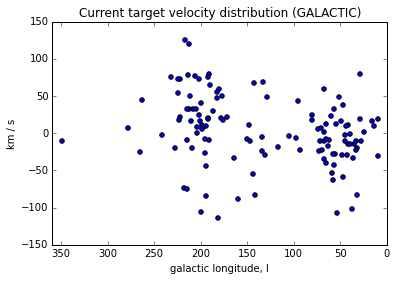

In [251]:
plt.scatter(realCinGALACTIC.l.deg, realV)
plt.xlim(360,0)
plt.xlabel("galactic longitude, l")
plt.ylabel(realV.unit)
plt.title("Current target velocity distribution (GALACTIC)")
plt.show()
# see diff, draw line at l = 120???

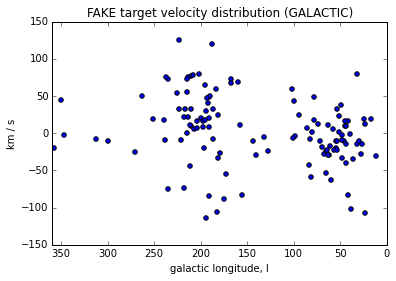

In [252]:
plt.scatter(fakeCinGALACTIC.l.deg, realV)
plt.xlim(360,0)
plt.xlabel("galactic longitude, l")
plt.ylabel(realV.unit)
plt.title("FAKE target velocity distribution (GALACTIC)")
plt.show()
# see diff, draw line at l = 120???

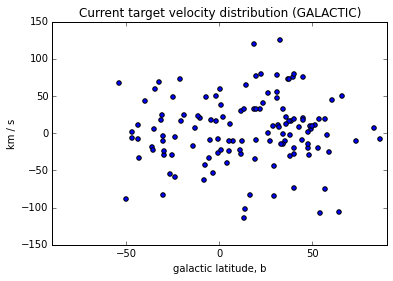

In [203]:
plt.scatter(realCinGALACTIC.b.deg, realV)
plt.xlim(-90,90)
plt.xlabel("galactic latitude, b")
plt.ylabel(realV.unit)
plt.title("Current target velocity distribution (GALACTIC)")
plt.show()

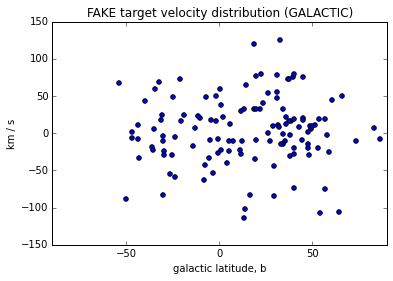

In [253]:
plt.scatter(fakeCinGALACTIC.b.deg, realV)
plt.xlim(-90,90)
plt.xlabel("galactic latitude, b")
plt.ylabel(realV.unit)
plt.title("FAKE target velocity distribution (GALACTIC)")
plt.show()